<p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold"><br>
Main Description</p><br>

## 0. Libraries

In [1]:
#dataframes
import pandas as pd
#graficos
import matplotlib.pyplot as plt 
import seaborn as sns

## 1. Open Data Frame

In [2]:
df = pd.read_csv(r'../data/box_data.csv', sep = ',')

In [3]:
df.head(3) #the 3 first rows in our df

,user_id,install_time,platform,country_region,city,gender,min_age_range,max_age_range,event_1,event_2,event_3,event_4,event_5,target_churn_indicator
0,2ba6f357,2018-07-04 19:24:24,Android,Santa Cruz,Río Gallegos,male,13,17,1,2,0,1,1,0
1,3cb936c1,2018-06-30 13:41:29,Android,Corrientes,Corrientes,male,13,17,0,7,0,3,0,1
2,17d88bbc,2018-06-30 16:02:30,Android,Cordoba,Villa Carlos Paz,female,18,20,2,1,0,2,2,1


### Basic exploration

In [4]:
df.shape

(20000, 14)

In [5]:
df.columns

Index(['user_id', 'install_time', 'platform', 'country_region', 'city',
       'gender', 'min_age_range', 'max_age_range', 'event_1', 'event_2',
       'event_3', 'event_4', 'event_5', 'target_churn_indicator'],
      dtype='object')

There are **14** columns and the last column represent the **class**.

<p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold"><br>
Data Cleaning</p><br>

In [6]:
df.columns

Index(['user_id', 'install_time', 'platform', 'country_region', 'city',
       'gender', 'min_age_range', 'max_age_range', 'event_1', 'event_2',
       'event_3', 'event_4', 'event_5', 'target_churn_indicator'],
      dtype='object')

<h1 style="font-size:1.5em;color:#2467C0"> A. Verification: </h1>

### Null values

In [7]:
df.isnull().any() #null values

user_id                   False
install_time              False
platform                  False
country_region             True
city                       True
gender                    False
min_age_range             False
max_age_range             False
event_1                   False
event_2                   False
event_3                   False
event_4                   False
event_5                   False
target_churn_indicator    False
dtype: bool

Exist null values in `country_region` and `city`

### Duplicates

In [8]:
print('Total_rows:{} \nTotal_unique_id:{}'.format(len(df),len(df['user_id'].unique())))

Total_rows:20000 
Total_unique_id:18533


In [9]:
print('Exists {} duplicates ID'.format(len(df)-len(df['user_id'].unique())))

Exists 1467 duplicates ID


### Categorical Values

In [10]:
df['platform'].value_counts()

Android    19512
iOS          488
Name: platform, dtype: int64

**Android** is the most usual platform to play this game.

In [11]:
df['gender'].value_counts()

female     10835
male        8992
unknown      173
Name: gender, dtype: int64

Exists **173** users with unknown gender

In [12]:
df['target_churn_indicator'].value_counts()

1    10814
0     9186
Name: target_churn_indicator, dtype: int64

Great! we can see this is a boolean value.

### Date

In [13]:
df.index = pd.to_datetime(df['install_time'], format='%Y-%m-%d %H:%M:%S') #parsing the date format and indexing
del df['install_time'] #del the duplicate feature

In [14]:
print('Period of study: {} - {}'.format(df.index.min(), df.index.max()))

Period of study: 2018-06-30 00:00:36 - 2018-07-07 23:59:47


In [15]:
df.index.month.value_counts()

7    17692
6     2308
Name: install_time, dtype: int64

In [16]:
df.index.day.value_counts()

1     2837
7     2722
3     2598
2     2469
6     2392
4     2368
30    2308
5     2306
Name: install_time, dtype: int64

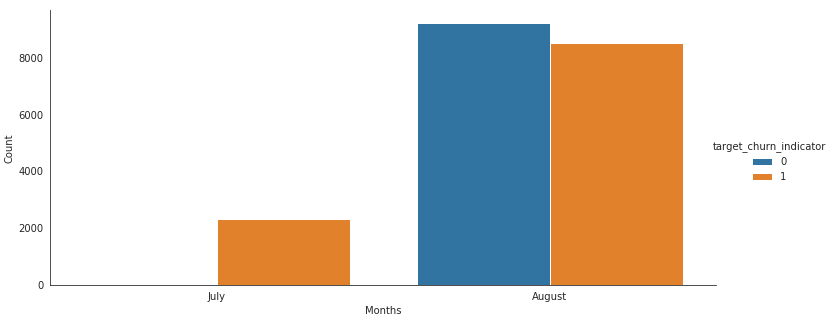

In [17]:
with sns.axes_style('white'):
    g = sns.catplot(x=df.index.month, hue='target_churn_indicator', data=df, aspect=2, kind="count")
    g.set_ylabels('Count')
    g.set_xlabels('Months')
    g.set_xticklabels(['July','August']);

In [18]:
df.groupby(df.index.month)['target_churn_indicator'].value_counts()

install_time  target_churn_indicator
6             1                         2308
7             0                         9186
              1                         8506
Name: target_churn_indicator, dtype: int64

We can see, exist on `imbalanced class` case for **30-07-2018** and does not exist **31-07-2018** and assuming it's a error, We only work with august month.

In [19]:
df = df.loc[df.index > '2018-07-01'] #month filter

In [20]:
print('Period of study: {} - {}'.format(df.index.min(), df.index.max()))

Period of study: 2018-07-01 00:00:03 - 2018-07-07 23:59:47


**Note:** the new period of study, correspond to first week on august month

#### Age Range

In [21]:
df[['min_age_range','max_age_range']].describe()

,min_age_range,max_age_range
count,17692.000000,17692.000000
mean,16.155946,18.890402
std,2.417209,1.448814
min,13.000000,13.000000
25%,13.000000,17.000000
50%,18.000000,20.000000
75%,18.000000,20.000000
max,21.000000,20.000000


Here we can see one stranger thing between the max value of `min_age_range` and `max_age_range`, We will attend this with data analytics.

### Events

In [22]:
df[['event_1','event_2','event_3','event_4','event_5']].describe()

,event_1,event_2,event_3,event_4,event_5
count,17692.000000,17692.000000,17692.000000,17692.000000,17692.000000
mean,13.797536,18.766109,0.536005,4.366719,4.434547
std,18.929249,26.920965,1.264787,4.240727,4.456303
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,3.000000,0.000000,1.000000,2.000000
50%,6.000000,9.000000,0.000000,3.000000,3.000000
75%,18.000000,24.000000,1.000000,6.000000,6.000000
max,216.000000,437.000000,20.000000,56.000000,51.000000


### Geo Data

In [23]:
geo_counts = {'Regions' : len(df['country_region'].unique()), 'Cities' : len(df['city'].unique())} #Unique Values
print('Our data is distributed around: {}'.format(geo_counts))

Our data is distributed around: {'Regions': 34, 'Cities': 751}


<h1 style="font-size:1.5em;color:#2467C0"> B. Actions: </h1>

Really depends of choice about the model selection, is possible work without apply  some data cleaning actions, but, because we cant ask about the rise of mistakes, we decide apply the follows criterias:

In [24]:
df = df.dropna() #drop rows with NAN values

In [25]:
df = df.drop_duplicates(df.columns[df.columns.isin(['user_id'])], keep = 'first') #work with only one user_id

In [26]:
df = df[df.gender != 'unknown'] #drop gender with unkwown values

In [27]:
df.shape

(15503, 13)

<p style="font-family: Arial; font-size:2.75em;color:purple; font-style:bold"><br>
Linearizing and deploying with localpacks</p><br>

In [28]:
from localpacks.data import get_data #

get_data is a function, and take the original df and apply all clean decisions defined in this notebook.

In [29]:
df_clean= get_data( parse_date = True, clean = True) # calling the fuction

In [30]:
df_clean.shape 

(15503, 13)

In [31]:
df.head()

,user_id,platform,country_region,city,gender,min_age_range,max_age_range,event_1,event_2,event_3,event_4,event_5,target_churn_indicator
install_time,,,,,,,,,,,,,
2018-07-04 19:24:24,2ba6f357,Android,Santa Cruz,Río Gallegos,male,13,17,1,2,0,1,1,0
2018-07-02 21:08:33,7baa10b6,Android,Buenos Aires,Don Torcuato,female,13,17,5,6,0,2,5,0
2018-07-07 04:18:47,120d379,Android,Santiago del Estero,Santiago del Estero,female,13,17,8,12,0,2,3,0
2018-07-03 05:55:47,c35079e1,Android,Buenos Aires,Florencio Varela,male,18,20,35,46,4,10,12,0
2018-07-01 03:22:32,d66b5d4d,Android,Entre Rios,Villa Angelica,male,13,17,38,40,0,6,15,0
